In [ ]:
import numpy as np
import pandas as pd

NaT for NumPy np.datetime64, np.timedelta64, and PeriodDtype. For typing applications, use api.types.NaTType.

In [ ]:
# in date time value null is in the form of NAT
pd.Series([1,2],dtype=np.dtype("timedelta64[ns]")).reindex([0,1,2])

0   0 days 00:00:00.000000001
1   0 days 00:00:00.000000002
2                         NaT
dtype: timedelta64[ns]

In [ ]:
pd.Series([1,2],dtype=np.dtype("datetime64[ns]")).reindex([0,1,2])

0   1970-01-01 00:00:00.000000001
1   1970-01-01 00:00:00.000000002
2                             NaT
dtype: datetime64[ns]

In [ ]:
pd.Series(['2020','2022'],dtype = pd.PeriodDtype('D')).reindex([0,1,2])

0    2020-01-01
1    2022-01-01
2           NaT
dtype: period[D]

NA for StringDtype, Int64Dtype (and other bit widths), Float64Dtype`(and other bit widths), :class:`BooleanDtype and ArrowDtype.

**NAN**

In [ ]:
pd.Series([12,18],dtype ='int64').reindex([0,1,2])


0    12.0
1    18.0
2     NaN
dtype: float64

In [ ]:
pd.Series([True,False], dtype = bool).reindex([0,1,2])

0     True
1    False
2      NaN
dtype: object

To detect these missing value, use the **isna()** or **notna()** methods.

In [ ]:
sec = pd.Series([pd.Timestamp("2024-05-23"),pd.NaT])
sec

0   2024-05-23
1          NaT
dtype: datetime64[ns]

In [ ]:
pd.isna(sec)


0    False
1     True
dtype: bool

In [ ]:
pd.notna(sec)

0     True
1    False
dtype: bool

In [ ]:
s = pd.Series([1,None],dtype = object)
s

0       1
1    None
dtype: object

In [ ]:
pd.isna(s)

0    False
1     True
dtype: bool

an equality comparison between a DataFrame or Series with one of these missing values does not provide the same information as isna() or notna().

In [ ]:
k = pd.Series([True ,None],dtype="boolean")
k

0    True
1    <NA>
dtype: boolean

In [ ]:
k == pd.NA

0    <NA>
1    <NA>
dtype: boolean

In [ ]:
pd.isna(k)

0    False
1     True
dtype: bool

#### Propagation in arithmetic and comparison operations
In general, missing values propagate in operations involving NA. When one of the operands is unknown, the outcome of the operation is also unknown.

For example, NA propagates in arithmetic operations, similarly to np.nan:

In [ ]:
pd.NA+1

<NA>

In [ ]:
"a"*pd.NA

<NA>

There are a few special cases when the result is known, even when one of the operands is NA.

In [ ]:

0 ** pd.NA

<NA>

In [ ]:
pd.NA ** 1

<NA>

In [ ]:
pd.NA == 1

<NA>

In [ ]:
pd.NA == pd.NA

<NA>

In [ ]:
pd.NA < 2.5

<NA>

In [ ]:
# but
pd.isna(pd.NA)

True

#### NA with Logical operations

In [ ]:
True| pd.NA

True

In [ ]:
pd.NA | True

True

In [ ]:
True | False

True

 if one of the operands is False, the result depends on the value of the other operand. Therefore, in this case NA propagates:

In [ ]:
False|False

False

In [ ]:
False|pd.NA

<NA>

In [ ]:
pd.NA|False

<NA>

In [ ]:
# with &
True& False

False

In [ ]:
True&pd.NA

<NA>

In [ ]:
True & True

True

In [ ]:
False & pd.NA

False

In [ ]:
False & True

False

In [ ]:
False & False

False

#### NA in a boolean context
Since the actual value of an NA is unknown, it is ambiguous to convert NA to a boolean value.

In [ ]:
bool(pd.NA)

TypeError: boolean value of NA is ambiguous

This also means that NA cannot be used in a context where it is evaluated to a boolean, such as if condition: ... where condition can potentially be NA. In such cases  we us isna()

### Inserting missing data

In [ ]:
a= pd.Series([1,2,3,4])
a

0    1
1    2
2    3
3    4
dtype: int64

In [ ]:
a.loc[2] = pd.NA
a

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [ ]:
k = pd.Series([pd.Timestamp('2021'),pd.Timestamp('2024')])
k

0   2021-01-01
1   2024-01-01
dtype: datetime64[ns]

In [ ]:
k[0] = np.nan
k

0          NaT
1   2024-01-01
dtype: datetime64[ns]

In [ ]:
e = pd.Series([True,False],dtype="boolean[pyarrow]")
e

0     True
1    False
dtype: bool[pyarrow]

In [ ]:
e.iloc[0] = None
e

0     <NA>
1    False
dtype: bool[pyarrow]

but **For object types, pandas will use the value given:**

In [ ]:
s = pd.Series(["a", "b", "c"], dtype=object)
s


0    a
1    b
2    c
dtype: object

In [ ]:
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

### Calculations with missing data
Missing values propagate through arithmetic operations between pandas objects.

In [ ]:
ser1 = pd.Series([np.nan, np.nan, 2, 3])

ser2 = pd.Series([np.nan, 1, np.nan, 4])

In [ ]:
ser1

0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64

In [ ]:
ser2

0    NaN
1    1.0
2    NaN
3    4.0
dtype: float64

In [ ]:
ser1+ser2

0    NaN
1    NaN
2    NaN
3    7.0
dtype: float64

When summing data, NA values or empty data will be treated as zero.

In [ ]:
pd.Series([np.nan]).sum()

0.0

In [ ]:
pd.Series([],dtype='float64').sum()

0.0

When taking the product, NA values or empty data will be treated as 1.

In [ ]:
pd.Series([np.nan]).prod()

1.0

**Cumulative methods** like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [ ]:
ser = pd.Series([1, np.nan, 3, np.nan])
ser

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [ ]:
ser.cumsum()

0    1.0
1    NaN
2    4.0
3    NaN
dtype: float64

In [ ]:
ser.cumsum(skipna=False)

0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64

In [ ]:
ser.cumprod()

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [ ]:
ser.cumprod(skipna=False)

0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64

### Dropping missing data
dropna() dropa rows or columns with missing data.

In [ ]:
df = pd.DataFrame([[np.nan, 1, 2], [1, 2, np.nan], [1, 2, 3]])
df

,0,1,2
0,NaN,1,2.0
1,1.0,2,NaN
2,1.0,2,3.0


In [ ]:
df.dropna()
# row with NA are drop

,0,1,2
2,1.0,2,3.0


In [ ]:
df.dropna(axis =1)

,1
0,1
1,2
2,2


### Filling missing data

In [ ]:
data = {"np": [1.0, np.nan, np.nan, 2], "arrow": pd.array([1.0, pd.NA, pd.NA, 2], dtype="float64[pyarrow]")}


In [ ]:
df= pd.DataFrame(data)
df

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [ ]:
df.fillna(1)

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0


In [ ]:
df

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [ ]:
df.fillna(21,inplace =True)

In [ ]:
df

,np,arrow
0,1.0,1.0
1,21.0,21.0
2,21.0,21.0
3,2.0,2.0


**Fill gaps forward or backward**

In [ ]:
d = data = {"np": [1.0, np.nan, np.nan, 2], "arrow": pd.array([1.0, pd.NA, pd.NA, 2], dtype="float64[pyarrow]")}
a = pd.DataFrame(d)
a

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [ ]:
a.ffill()

<ipython-input-111-723bf48a2c41>:1: PerformanceWarning: Falling back on a non-pyarrow code path which may decrease performance.
  a.ffill()


,np,arrow
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0


In [ ]:
a.bfill()

<ipython-input-113-36a7e1c06e65>:1: PerformanceWarning: Falling back on a non-pyarrow code path which may decrease performance.
  a.bfill()


,np,arrow
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0


Limit the number of NA values filled

In [ ]:
a

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [ ]:
a.ffill(limit=1)

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,NaN,<NA>
3,2.0,2.0


NA values can be replaced with corresponding value from a Series or DataFrame where the index and column aligns between the original object and the filled object.

In [ ]:
dff = pd.DataFrame(np.arange(30, dtype=np.float64).reshape(10, 3), columns=list("ABC"))

dff.iloc[3:5, 0] = np.nan

dff.iloc[4:6, 1] = np.nan

dff.iloc[5:8, 2] = np.nan

dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,NaN,10.0,11.0
4,NaN,NaN,14.0
5,15.0,NaN,NaN
6,18.0,19.0,NaN
7,21.0,22.0,NaN
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [ ]:
dff.fillna(dff.mean())
# some places it fills with 14.25 in some places 13.571429

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


DataFrame.where() can also be used to fill NA values.Same result as above.

In [ ]:
dff.where(pd.notna(dff),dff.mean(),axis = 'columns')

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


### Interpolation
DataFrame.interpolate() and Series.interpolate() fills NA values using various interpolation methods.

In [ ]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)

In [ ]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [ ]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [ ]:
# creating time series indexing data
idx = pd.date_range("2024-05-20",periods=10,freq='D')

data = np.random.default_rng(2).integers(1,10,10).astype(np.float64)
idx

DatetimeIndex(['2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23',
               '2024-05-24', '2024-05-25', '2024-05-26', '2024-05-27',
               '2024-05-28', '2024-05-29'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
data

array([8., 3., 1., 3., 4., 8., 5., 1., 4., 6.])

In [ ]:
ts = pd.Series(data,index = idx)
ts

2024-05-20    8.0
2024-05-21    3.0
2024-05-22    1.0
2024-05-23    3.0
2024-05-24    4.0
2024-05-25    8.0
2024-05-26    5.0
2024-05-27    1.0
2024-05-28    4.0
2024-05-29    6.0
Freq: D, dtype: float64

In [ ]:
ts.iloc[[1, 2, 5, 6, 9]] = np.nan
ts

2024-05-20    8.0
2024-05-21    NaN
2024-05-22    NaN
2024-05-23    3.0
2024-05-24    4.0
2024-05-25    NaN
2024-05-26    NaN
2024-05-27    1.0
2024-05-28    4.0
2024-05-29    NaN
Freq: D, dtype: float64

<Axes: >

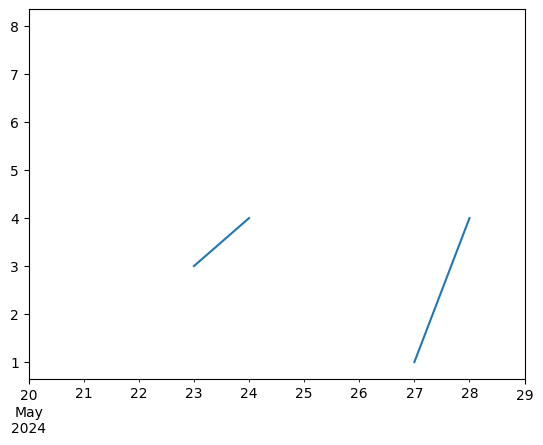

In [ ]:
# plot the data
ts.plot()

In [ ]:
ts.interpolate()

2024-05-20    8.000000
2024-05-21    6.333333
2024-05-22    4.666667
2024-05-23    3.000000
2024-05-24    4.000000
2024-05-25    3.000000
2024-05-26    2.000000
2024-05-27    1.000000
2024-05-28    4.000000
2024-05-29    4.000000
Freq: D, dtype: float64

<Axes: >

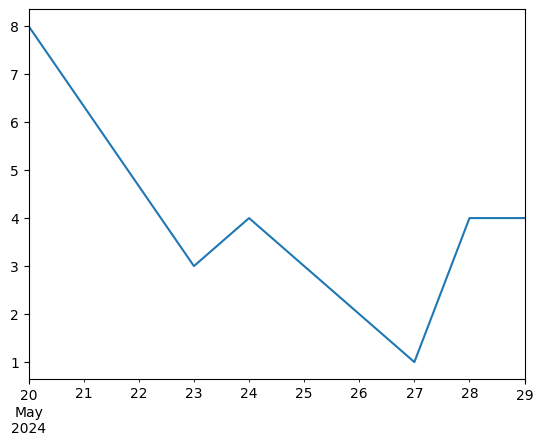

In [ ]:
# after interpolation
ts.interpolate().plot()

In [ ]:
ts2 = ts.iloc[[0, 1, 3, 7, 9]]

In [ ]:
ts2

2024-05-20    8.0
2024-05-21    NaN
2024-05-23    3.0
2024-05-27    1.0
2024-05-29    NaN
dtype: float64

In [ ]:
ts2.interpolate()

2024-05-20    8.0
2024-05-21    5.5
2024-05-23    3.0
2024-05-27    1.0
2024-05-29    1.0
dtype: float64

In [ ]:
ts2.interpolate(method='time')

2024-05-20    8.000000
2024-05-21    6.333333
2024-05-23    3.000000
2024-05-27    1.000000
2024-05-29    1.000000
dtype: float64

For a floating-point index, use method='values':

In [ ]:
idx = [0.0, 1.0, 10.0]

ser = pd.Series([0.0, np.nan, 10.0], idx)

In [ ]:
ser

0.0      0.0
1.0      NaN
10.0    10.0
dtype: float64

In [ ]:
ser.interpolate()

0.0      0.0
1.0      5.0
10.0    10.0
dtype: float64

In [ ]:
ser.interpolate(method='values')

0.0      0.0
1.0      1.0
10.0    10.0
dtype: float64

**If you are dealing with a time series that is growing at an increasing rate, use method='barycentric'.**

**If you have values approximating a cumulative distribution function, use method='pchip'.**

**To fill missing values with goal of smooth plotting use method='akima'.**

In [ ]:
df = pd.DataFrame(
   {
      "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
      "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
   }
)

In [ ]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [ ]:
df.interpolate(method='barycentric')

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [ ]:
df.interpolate(method='pchip')

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [ ]:
df.interpolate(method = 'akima')

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


When interpolating via a polynomial or spline approximation, you must also specify the degree or order of the approximation:

In [ ]:
df.interpolate(method='spline',order = 2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [ ]:
df.interpolate(method='polynomial',order = 2)

,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


Comparing several methods.

<Axes: >

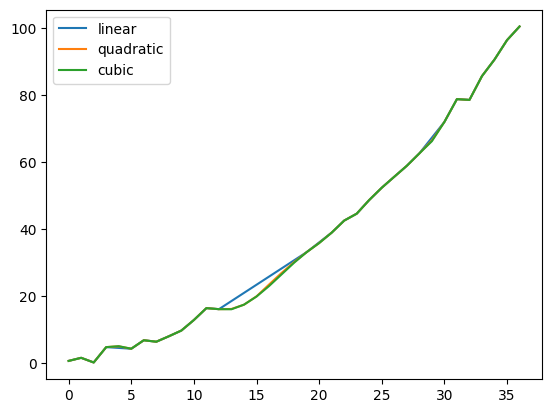

In [ ]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser.iloc[missing] = np.nan

methods = ["linear", "quadratic", "cubic"]

df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

df.plot()

Interpolation limits
interpolate() accepts a limit keyword argument to limit the number of consecutive NaN values filled since the last valid observation

In [ ]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])

ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [ ]:
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [ ]:
ser.interpolate(limit=1)
# it show from back side so last two values are nan 3rd element from the last is 13 with index 6 so here now 7th indexed element willl filled
# because defaultly its a forward fill

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

By default, NaN values are filled in a forward direction. Use limit_direction parameter to fill backward or from both directions.

In [ ]:
ser.interpolate(limit=1,limit_direction="backward")
# see the diffrence from the above

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [ ]:
ser.interpolate(limit=1,limit_direction="both")

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7    13.0
8     NaN
dtype: float64

In [ ]:
ser.interpolate(limit_direction='both')

0     5.0
1     5.0
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

By default, NaN values are filled whether they are surrounded by existing valid values or outside existing valid values. The limit_area parameter restricts filling to either inside or outside values.

In [ ]:
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [ ]:
# fill one consecutive inside value in both directions
ser.interpolate(limit_direction='both',limit_area='inside',limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [ ]:
# fill all consecutive outside values backward
ser.interpolate(limit_direction='backward',limit_area='outside')

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [ ]:
# fill all consecutive outside values in both directions
ser.interpolate(limit_direction='both',limit_area='outside')

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

### Replacing values
Series.replace() and DataFrame.replace() can be used similar to Series.fillna() and DataFrame.fillna() to replace or insert missing values.



In [ ]:
df = pd.DataFrame(np.eye(3))
df


,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [ ]:
df_missing = df.replace(0,np.nan)
df_missing

,0,1,2
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


In [ ]:
df_filled = df_missing.replace(np.nan,2)
df_filled

,0,1,2
0,1.0,2.0,2.0
1,2.0,1.0,2.0
2,2.0,2.0,1.0


Replacing more than one value is possible by passing a list

In [ ]:
df_filled.replace([1,44],[3,28])

,0,1,2
0,3.0,2.0,2.0
1,2.0,3.0,2.0
2,2.0,2.0,3.0


In [ ]:
df_filled.replace({1:44,2:28})

,0,1,2
0,44.0,28.0,28.0
1,28.0,44.0,28.0
2,28.0,28.0,44.0


### Regular expression replacement

In [ ]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df= pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [ ]:
df.replace('.',np.nan)


,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


Regular expression to be learn